# Run a single phase fit and submit the residuals to the PDFitc

In [1]:
%run -i startup2.py

## Export the residuals to a file

Load the data.

In [4]:
info = pd.read_csv("data_info.csv")
info

,sample,iq,sq,fq,gr,fgr0,fgr1,fgr2,csv0,csv1,...,csv_two_phase,fgr_two_phase,csv_two_phase_sine_wave,fgr_two_phase_sine_wave,csv_one_phase_logsp,fgr_one_phase_logsp,csv_two_phase_logsp,fgr_two_phase_logsp,final_csv,final_fgr
0,JBNP31,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,res/JBNP31_fix_xyz_0.fgr,res/JBNP31_free_xyz_0.fgr,res/JBNP31_free_xyz_add_delta_0.fgr,res/JBNP31_fix_xyz_0.csv,res/JBNP31_free_xyz_0.csv,...,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr,NaN,NaN,res/JBNP31_one_phase_logsp_0.csv,res/JBNP31_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr
1,JBNP32L,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,res/JBNP32L_fix_xyz_0.fgr,res/JBNP32L_free_xyz_2.fgr,res/JBNP32L_free_xyz_add_delta_1.fgr,res/JBNP32L_fix_xyz_0.csv,res/JBNP32L_free_xyz_2.csv,...,NaN,NaN,res/JBNP32L_two_phase_sine_wave_0.csv,res/JBNP32L_two_phase_sine_wave_0.fgr,res/JBNP32L_one_phase_logsp_0.csv,res/JBNP32L_one_phase_logsp_0.fgr,res/JBNP32L_two_phase_logsp_0.csv,res/JBNP32L_two_phase_logsp_0.fgr,res/JBNP32L_add_sine_wave_0.csv,res/JBNP32L_add_sine_wave_0.fgr
2,JBNP32,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,res/JBNP32_fix_xyz_0.fgr,res/JBNP32_free_xyz_0.fgr,res/JBNP32_free_xyz_add_delta_0.fgr,res/JBNP32_fix_xyz_0.csv,res/JBNP32_free_xyz_0.csv,...,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr,NaN,NaN,res/JBNP32_one_phase_logsp_0.csv,res/JBNP32_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr
3,JBNP33L,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,res/JBNP33L_fix_xyz_0.fgr,res/JBNP33L_free_xyz_0.fgr,res/JBNP33L_free_xyz_add_delta_0.fgr,res/JBNP33L_fix_xyz_0.csv,res/JBNP33L_free_xyz_0.csv,...,NaN,NaN,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr,res/JBNP33L_one_phase_logsp_1.csv,res/JBNP33L_one_phase_logsp_1.fgr,res/JBNP33L_two_phase_logsp_0.csv,res/JBNP33L_two_phase_logsp_0.fgr,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr
4,JBNP33,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,res/JBNP33_fix_xyz_0.fgr,res/JBNP33_free_xyz_0.fgr,res/JBNP33_free_xyz_add_delta_0.fgr,res/JBNP33_fix_xyz_0.csv,res/JBNP33_free_xyz_0.csv,...,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr,NaN,NaN,res/JBNP33_one_phase_logsp_0.csv,res/JBNP33_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr


In [5]:
# data profile
profile = io.load_profile(info.loc[3]["gr"], {"qdamp":0.0313, "qbroad": 0.0131})

Export the residuals after the bronze and ligand is subtracted.

In [9]:
model = create_model_single_spherical()
model.set_profile(profile)
model.load("results2/JBNP33L.txt")
model.set_xrange(1.6, 50.0, 0.01)

In [14]:
model.set_order(["B_scale", "B_f_psize", "B_f_psig"], "B_lat", "B_adp", "B_xyz")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 4: Free B_scale, B_f_psize, B_f_psig ...
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 9.4659e+00, final cost 9.2646e+00, first-order optimality 1.68e-06.
Round 2 / 4: Free B_lat ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 9.2646e+00, final cost 9.0625e+00, first-order optimality 1.22e-01.
Round 3 / 4: Free B_adp ...
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 9.0625e+00, final cost 7.9134e+00, first-order optimality 9.15e-02.
Round 4 / 4: Free B_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 7.9134e+00, final cost 6.3292e+00, first-order optimality 3.20e-01.
Optimization result: Rw = 0.209191.


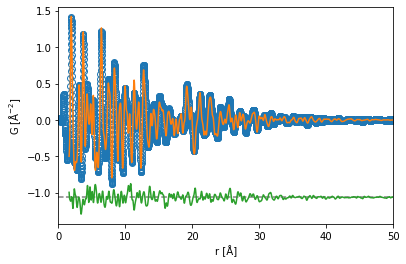

In [15]:
model.plot()

In [16]:
fits = model.export_fits()
fits

<xarray.Dataset>
Dimensions:  (x: 4841, xobs: 10001)
Coordinates:
  * x        (x) float64 1.6 1.61 1.62 1.63 1.64 ... 49.97 49.98 49.99 50.0
  * xobs     (xobs) float64 0.0 0.01 0.02 0.03 0.04 ... 99.97 99.98 99.99 100.0
Data variables:
    y        (x) float64 -0.4303 -0.437 -0.4399 ... 0.0009551 0.001426 0.001998
    ycalc    (x) float64 -0.5 -0.4895 -0.4768 ... -0.0008986 -0.0009699
    yobs     (xobs) float64 0.0 -0.004579 -0.008917 ... 0.00147 0.001737

In [17]:
fits["ydiff"] = fits["y"] - fits["ycalc"]
fits["ydiff"].attrs = fits["ycalc"].attrs
residuals = np.stack([fits["x"].values, fits["ydiff"].values])

In [23]:
model.save_all("results4", "JBNP33L_single_lognormal")

In [18]:
np.savetxt("summary/JBNP33L_x_ydiff_single_phase_fit.gr", residuals.T)

## Upload to PDFitc

https://pdfitc.org/

## The found structures from PDFitc

The PDFitc thinks the Anatase is the optimal candidate. It is correct.

In [57]:
results = pd.read_csv("summary/JBNP33L_search_after_single_fit.csv", index_col=0)

In [58]:
sel_results = results[["rw", "space_group", "db", "db_id"]]
sel_results.head(15)

,rw,space_group,db,db_id
0,0.836536,I4_1/amd,COD,7206075
1,0.836586,I4_1/amd,COD,1526931
2,0.836725,I4_1/amd,COD,9008213
3,0.836733,I4_1/amd,COD,9015929
4,0.836767,I4_1/amd,COD,9008214
5,0.836788,I4_1/amd,COD,9008215
6,0.836831,I4_1/amd,COD,9008216
7,0.837126,I4_1/amd,COD,9009086
8,0.843697,I4_1/amd,MPD,mp-390
9,0.844079,I4_1/amd,COD,1010942


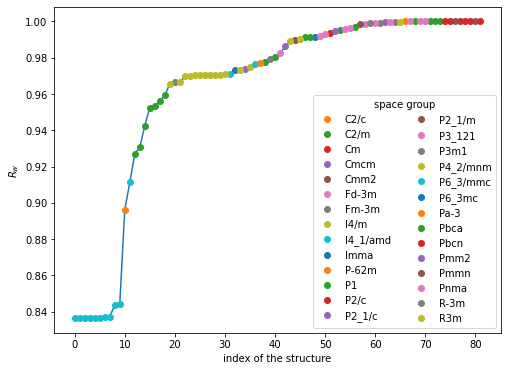

In [7]:
def plot_in_groups(data, by, ax, *, ncol):
    grouped = data.groupby(by)
    ax.plot(data.index, data["rw"], '-')
    for name, group in grouped:
        ax.plot(group.index, group["rw"], "o", label=name)
    ax.legend(ncol=ncol, title="space group")
    ax.set_ylabel("$R_w$")
    ax.set_xlabel("index of the structure")
    return

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_in_groups(sel_results, "space_group", ax, ncol=2)

In [59]:
df_to_show = sel_results.rename(columns={"rw": r"$R_w$", "space_group": "space group", "db_id": "db id"}).head(20)
df_to_show = df_to_show.set_index(df_to_show.index + 1)
df_to_show["space group"] = df_to_show["space group"].apply(lambda x: x.replace("_1", "$_1$").replace("_2", "$_2$"))
df_to_show["db id"] = [
    "{}\\cite{{cif-reference-1-{}}}".format(df_to_show["db id"].iloc[i], i)
    for i in range(df_to_show.shape[0])
]
df_to_show

,$R_w$,space group,db,db id
1,0.836536,I4$_1$/amd,COD,7206075\cite{cif-reference-1-0}
2,0.836586,I4$_1$/amd,COD,1526931\cite{cif-reference-1-1}
3,0.836725,I4$_1$/amd,COD,9008213\cite{cif-reference-1-2}
4,0.836733,I4$_1$/amd,COD,9015929\cite{cif-reference-1-3}
5,0.836767,I4$_1$/amd,COD,9008214\cite{cif-reference-1-4}
6,0.836788,I4$_1$/amd,COD,9008215\cite{cif-reference-1-5}
7,0.836831,I4$_1$/amd,COD,9008216\cite{cif-reference-1-6}
8,0.837126,I4$_1$/amd,COD,9009086\cite{cif-reference-1-7}
9,0.843697,I4$_1$/amd,MPD,mp-390\cite{cif-reference-1-8}
10,0.844079,I4$_1$/amd,COD,1010942\cite{cif-reference-1-9}


In [60]:
print(df_to_show.to_latex(escape=False))

\begin{tabular}{lrlll}
\toprule
{} &     $R_w$ & space group &   db &                              db id \\
\midrule
1  &  0.836536 &  I4$_1$/amd &  COD &    7206075\cite{cif-reference-1-0} \\
2  &  0.836586 &  I4$_1$/amd &  COD &    1526931\cite{cif-reference-1-1} \\
3  &  0.836725 &  I4$_1$/amd &  COD &    9008213\cite{cif-reference-1-2} \\
4  &  0.836733 &  I4$_1$/amd &  COD &    9015929\cite{cif-reference-1-3} \\
5  &  0.836767 &  I4$_1$/amd &  COD &    9008214\cite{cif-reference-1-4} \\
6  &  0.836788 &  I4$_1$/amd &  COD &    9008215\cite{cif-reference-1-5} \\
7  &  0.836831 &  I4$_1$/amd &  COD &    9008216\cite{cif-reference-1-6} \\
8  &  0.837126 &  I4$_1$/amd &  COD &    9009086\cite{cif-reference-1-7} \\
9  &  0.843697 &  I4$_1$/amd &  MPD &     mp-390\cite{cif-reference-1-8} \\
10 &  0.844079 &  I4$_1$/amd &  COD &    1010942\cite{cif-reference-1-9} \\
11 &  0.896091 &        C2/c &  MPD &  mp-34688\cite{cif-reference-1-10} \\
12 &  0.911245 &  I4$_1$/amd &  COD &   1530151

Replace the repeated reference names.

In [48]:
bib_text = "\n".join(replace_cif_reference(results["ref"].head(20), "cif-reference-0-"))
bib_file = "/Users/sst/project/papers/19st_tio2b/paper/pdfitc_0.bib"
with pathlib.Path(bib_file).open("w") as f:
    f.write(bib_text)

## Generate the table and the bib file for another pdfitc file

In [49]:
results = pd.read_csv("info/pdfitc_rmax_15.csv", index_col=0)

In [55]:
df_to_show = results[["rw", "space_group", "db", "db_id"]].rename(
    columns={"rw": r"$R_w$", "space_group": "space group", "db_id": "db id"}
).head(5)
df_to_show = df_to_show.set_index(df_to_show.index + 1)
df_to_show["space group"] = df_to_show["space group"].apply(lambda x: x.replace("_1", "$_1$").replace("_2", "$_2$"))
# put the reference on the db id
df_to_show["db id"] = [
    "{}\\cite{{cif-reference-1-{}}}".format(df_to_show["db id"].iloc[i], i)
    for i in range(df_to_show.shape[0])
]
df_to_show

,$R_w$,space group,db,db id
1,0.362457,C2/m,MPD,mp-554278\cite{cif-reference-1-0}
2,0.797578,C2/m,COD,1528778\cite{cif-reference-1-1}
3,0.845662,P1,MPD,mp-1245308\cite{cif-reference-1-2}
4,0.872968,I4$_1$/amd,COD,7206075\cite{cif-reference-1-3}
5,0.874363,I4$_1$/amd,COD,1526931\cite{cif-reference-1-4}


In [56]:
print(df_to_show.to_latex(escape=False))

\begin{tabular}{lrlll}
\toprule
{} &     $R_w$ & space group &   db &                               db id \\
\midrule
1 &  0.362457 &        C2/m &  MPD &   mp-554278\cite{cif-reference-1-0} \\
2 &  0.797578 &        C2/m &  COD &     1528778\cite{cif-reference-1-1} \\
3 &  0.845662 &          P1 &  MPD &  mp-1245308\cite{cif-reference-1-2} \\
4 &  0.872968 &  I4$_1$/amd &  COD &     7206075\cite{cif-reference-1-3} \\
5 &  0.874363 &  I4$_1$/amd &  COD &     1526931\cite{cif-reference-1-4} \\
\bottomrule
\end{tabular}



In [54]:
bib_text = "\n".join(replace_cif_reference(results["ref"].head(20), "cif-reference-1-"))
bib_file = "/Users/sst/project/papers/19st_tio2b/paper/pdfitc_1.bib"
with pathlib.Path(bib_file).open("w") as f:
    f.write(bib_text)